# Metody Głębokiego Uczenia
## Projekt 1 -  Implementacja algorytmu wstecznej propagacji błędu wperceptronie wielowarstwowym (MLP).
#### Tomasz Klonecki
#### Tomasz Radzikowski


## Wstęp
W projekcie stworzyliśmy program do obsługi sieci neuronowej, którą sami zaimplementowaliśmy.
Sieć uczy się metodą wstecznej propagacji błędu. 
Podczas obsługi programu możemy podać kilka zmiennych które definiują charakterystykę sieci:
- Liczba warstw i neuronów w każdej warstwie
- Funkcje aktywacji w każdej warstwie
- Liczbę iteracji (epok)
- Wartość współczynnika nauki
- Wartość współczynnika bezwładności

**Funkcja błędu** wykorzystywana w naszym algorytmie to MSE (Mean Squared Error).

**Funkcja aktywacji** warstw ukrytych jaką wykorzystaliśmy w testach to funkcja sigmoidalna:

$\large S(x)=\frac {1}{1+e^{-x}}=\frac {e^{x}}{e^{x}+1}$

- przyjmuje wartości od $0$ do $1$ co jest bardzo użyteczne, gdyż zawsze uzyskujemy znormalizowane wyniki. 

Oczywiście w miarę potrzeby można do pliku *activations.py* dopisać nową funkcję.

Poniżej zaprezentujemy uzyskane wyniki na podstawie przykładowych danych i przeanalizujemy dlaczego sieć dobrze działa dla niektórych parametrów a dla niektórych nie działa w ogóle.

### Instrukcja obsługi programu: 
1. Tworzymy obiekt klasy **Network** i podajemy parametry sieci

```brain = Network(learning_rate = 0.001, momentum_rate = 0.7, iterations = 100)```
2. Do obiektu klasy **Network** możemy dodać dowolną ilość warstw pochodzących z klasy **Layer**:</br>
    - **inputs:** liczba sygnałów wejściowych do warstwy
    - **outputs:** liczba sygnałów wyjściowych z warstwy
    - **activation_func:** funkcja aktywacji warstwy (na ten moment do wyboru mamy: sigmoid, softmax, linear)
    
```brain.add(Layer(inputs = 1, outputs = 2, activation_func = 'sigmoid'))```

3. Uczenie sieci odbywa się za pomocą jednej z dwóch wybranych metod uruchomionych na klasie Network
    - Batch training (full data set training)
        
        ```brain.train_and_evaluate(x[0],x[1],x[2],x[3])```
        - **x** to lista zwracana przez poniższe funkcje do wczytywania danych
    - Mini batch training (stochastic gradient descent)
        
        ```brain.train_mini_batch_and_evaluate(x[0],x[1],x[2],x[3],10)```
4. Pokazanie wyników dla nauczonej sieci

Należy wykorzystać opisane niżej funkcje do rysowania wykresów

### Oprócz tego napisaliśmy też kilka funkcji pomocniczych do wczytywania danych i do rysowania wykresów:
### Funkcje do wczytywania danych
```data_read_classification(name = 'three_gauss', size = 100)```

```data_read_regression(name = 'linear', size = 100)```
   - **name:** rodzaj zbioru danych
   - **size:** wielkość zbioru danych
   
### Funkcje do rysowania wykresów
```plot_classification(Network = brain, data = x)```
   - **Network:** obiekt klasy network 
   - **data:** dane zwrócone przez powyższe funkcje do wczytywania danych
   
```plot_regression(Network = brain, data = x)```
   - **Network:** obiekt klasy network 
   - **data:** dane zwrócone przez powyższe funkcje do wczytywania danych
   
```plot_classification_mesh(Network = brain, data = x)``` 

Funkcja do rysowania zbioru testowego jako siatki. Możemy dzięki temu lepiej zobaczyć prawidłowe dopasowanie. Tam gdzie mniej intensywny kolor nie zgadza się z bardziej intensywnym znaczy że dopasowanie nie zostało dobrze przeprowadzone.
   - **Network:** obiekt klasy network 
   - **data:** dane zwrócone przez powyższe funkcje do wczytywania danych
   
```plot_errors(errors)```
   - **errors:** lista zwrócona przez metodę ```train_and_evaluate``` lub ```train_mini_batch_and_evaluate``` dla klasy **Network**
   
```test_lr(Network, data, lrate)```

Funckja do testowania paramteru **Learning rate**.
   - **Network:** obiekt klasy network 
   - **data:** dane zwrócone przez powyższe funkcje do wczytywania danych
   - **lrate:** np.array zawierający różne learning rate do przetestowania np. lrate = np.random.uniform(0.00001,0.1,10)

### 1. Wczytanie bibliotek, plików klas i funkcji

In [1]:
from network import Layer
from network import Network
from program_functions import data_read_classification
from program_functions import data_read_regression
from program_functions import plot_classification
from program_functions import plot_regression
from program_functions import plot_errors
from program_functions import plot_classification_mesh
from program_functions import test_lr


import numpy as np

# Problem regresji
W problemie regresji zastosowaliśmy jedną praktyczną zmianę, czyli wykorzystanie funkcji liniowej $f(x) = x$ jako funkcji aktywacji w ostatniej warstwie sieci. </br>
Powodem jest potrzeba uzyskania na wyjściu sieci wartości z $\mathbb{R}^3$.


## Funkcja liniowa
Pierwszym problemem, z którym mierzy się nasza sieć jest rozwiązanie zagadnienia regresji liniowej. Stopień skomplikowania tego zadania zależy w dużej mierze od danych wejściowych, bowiem dla prostych funkcji nawet bardzo prymitywna sieć o małych rozmiarach i przy niskiej liczbie iteracji spełnia swoją funkcję w sposób dostatecznie dobry. Unaocznieniem powyższego stwierdzenia jest wykres nr $1$, gdzie dla dwuwarstwowej sieci $(1,2)$ i $10$ iteracji uzyskujemy niski błąd.

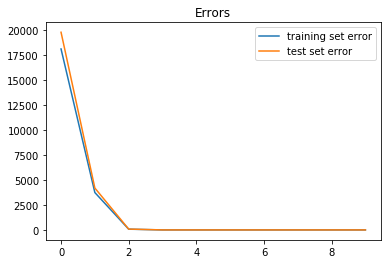

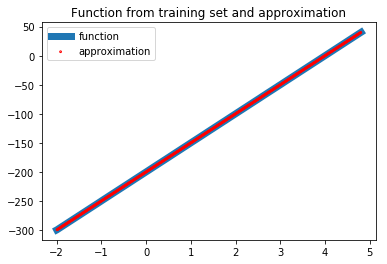

In [2]:
np.random.seed(0)
x = data_read_regression('linear',100)

# Przerobienie danych w taki sposób, aby zbiór treningowy i testowy miał tą samą dziedzinę
x3 = x[3][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x2 = x[2][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x[2] = x2
x[3] = x3
brain = Network(learning_rate = 0.0001, momentum_rate = 0.8, iterations = 10)
brain.add(Layer(1,2,'linear'))
brain.add(Layer(2,1,'linear'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_regression(brain, x)

## Funkcja kwadratowa

Jednak już dla dla funkcji kwadratowej błąd rośnie kilka tysięcy razy, a dopasowanie funkcji aproksymacyjnej (co jest absolutnie naturalne, biorąc pod uwagę, że sieć wykorzystuje funkcję liniową) jest bardzo niedokładne. Prosta zmiana funkcji aktywacji na pierwszej warstwie na funkcję sigmoidalną sprawia, że dopasowanie, choć nadal bardzo złe daje nadzieję na lepsze dopasowanie przy modyfikacji parametrów sieci.



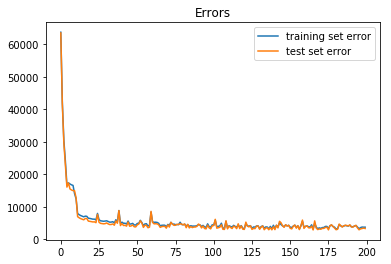

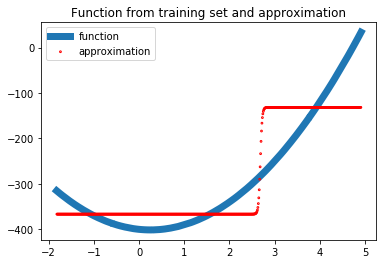

In [3]:
np.random.seed(0)
x = data_read_regression('square',100)

# Przerobienie danych w taki sposób, aby zbiór treningowy i testowy miał tą samą dziedzinę
x3 = x[3][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x2 = x[2][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x[2] = x2
x[3] = x3

brain = Network(learning_rate = 0.001, momentum_rate = 0.8,iterations = 200)
brain.add(Layer(1,2,'sigmoid'))
brain.add(Layer(2,1,'linear'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_regression(brain, x)

Samo dodanie neuronów w drugiej warstwie sprawia, że funkcja błędu jest o wiele gładsza i nie oscyluje między wartościami, błąd jest mniejszy dziesięciokrotnie.

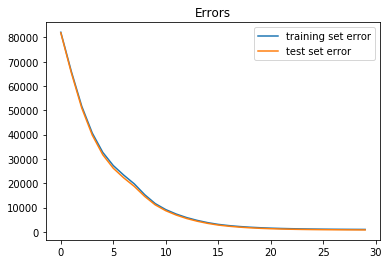

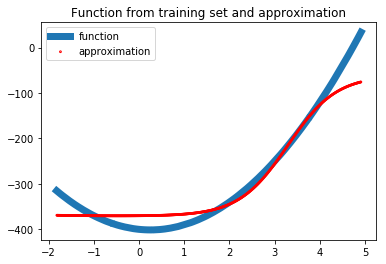

In [4]:
np.random.seed(0)
brain = Network(learning_rate = 0.0001, momentum_rate = 0.8, iterations = 30)
brain.add(Layer(1,20,'sigmoid'))
brain.add(Layer(20,1,'linear'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_regression(brain, x)

Dostatecznie dobre dopasowanie uzyskano, zwiększając liczbę iteracji dla sieci o trzech warstwach. Przebieg funkcji jest odwzorowany oprócz małych fragmentów na początku i na końcu wykresu.

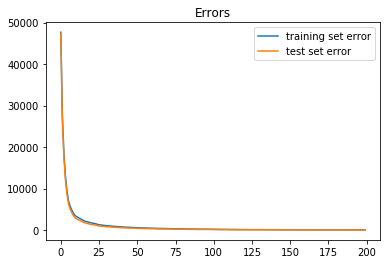

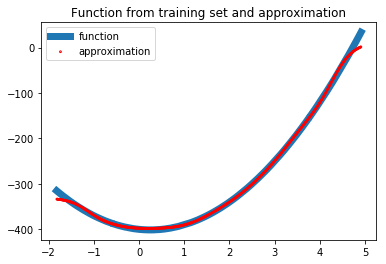

In [5]:
np.random.seed(1)

brain = Network(learning_rate = 0.0001, momentum_rate = 0.2, iterations = 200)
brain.add(Layer(1,150,'sigmoid'))
brain.add(Layer(150,80,'sigmoid'))
brain.add(Layer(80,1,'linear'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_regression(brain, x)

## Funkcja wielomianowa stopnia 3-ciego

Dla tego typu funkcji dobre rezultaty dało zwiększenie liczby iteracji i dodanie jeszcze jednej warstwy sieci. Ewentualną poprawę dopasowania można uzyskać w prosty sposób, poprzez dodanie kolejnych iteracji.

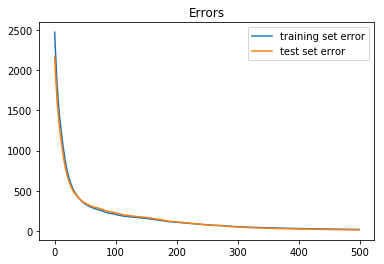

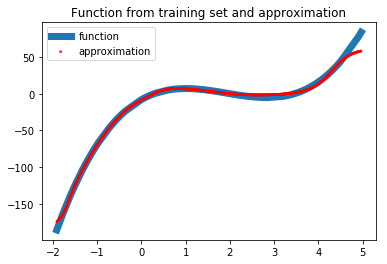

In [6]:
np.random.seed(0)
x = data_read_regression('cube',100)

# Przerobienie danych w taki sposób, aby zbiór treningowy i testowy miał tą samą dziedzinę
x3 = x[3][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x2 = x[2][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x[2] = x2
x[3] = x3

brain = Network(learning_rate = 0.0001, momentum_rate = 0.2, iterations = 500)
brain.add(Layer(1,150,'sigmoid'))
brain.add(Layer(150,200,'sigmoid'))
brain.add(Layer(200,80,'sigmoid'))
brain.add(Layer(80,1,'linear'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_regression(brain, x)

Kolejnym problemem, który rzutuje na jakość dopasowania jest wielkość zbioru treningowego. Rozpatrywany uprzednio przypadek o n=100 wymagał dużej sieci. Dla n=1000 znacznie mniejsza sieć radzi sobie z dopasowaniem.

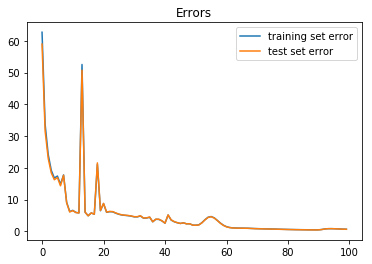

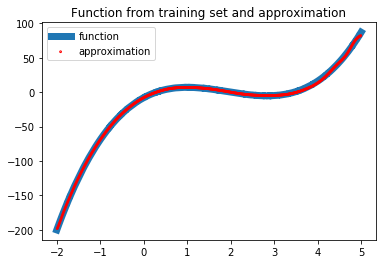

In [7]:
x = data_read_regression('cube',10000)

# Przerobienie danych w taki sposób, aby zbiór treningowy i testowy miał tą samą dziedzinę
x3 = x[3][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x2 = x[2][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x[2] = x2
x[3] = x3

brain = Network(learning_rate = 0.001, momentum_rate = 0.8, iterations = 100)
brain.add(Layer(1,30,'sigmoid'))
brain.add(Layer(30,15,'sigmoid'))
brain.add(Layer(15,1,'linear'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
#errors = brain.train_mini_batch_and_evaluate(x[0],x[1],x[2],x[3],10)
plot_errors(errors)
plot_regression(brain, x)

## Funkcja aktywacji
Dla funkcji aktywacji zachodzi ciekawe zjawisko, gdyż taka sama klasa funkcji jest reprezentowana w pierwszej warstwie sieci (funkcja sigmoidalna). W związku z tym, sieć z jednym neuronem w warstwie wejściowej, przy odpowiedniej liczbie iteracji pozwala na uzyskanie dopasowania.

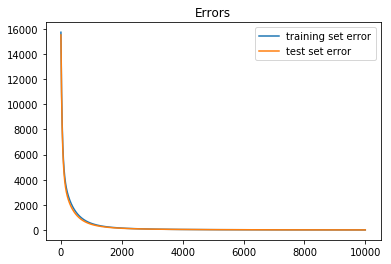

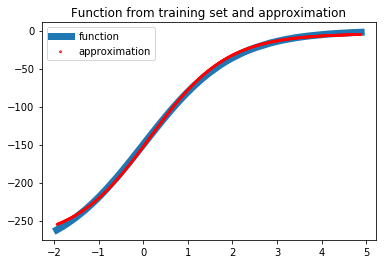

In [8]:
x = data_read_regression('activation',100)

# Przerobienie danych w taki sposób, aby zbiór treningowy i testowy miał tą samą dziedzinę
x3 = x[3][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x2 = x[2][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x[2] = x2
x[3] = x3

brain = Network(learning_rate = 0.0001, momentum_rate = 0.7, iterations = 10000)
brain.add(Layer(1,1,'sigmoid'))
brain.add(Layer(1,1,'linear'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_regression(brain, x)

## Funkcja multimodalna

Tego typu dane sprawiają sieci neuronowej duży kłopot. Nawet złożona sieć nie jest w stanie dobrze odwzorować funkcji w początkowym i końcowym przedziale.
Poniżej wykorzystamy 3-warstwową sieć o dużej ilości neuronów.

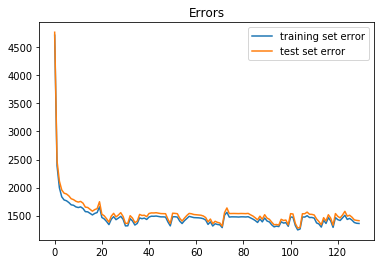

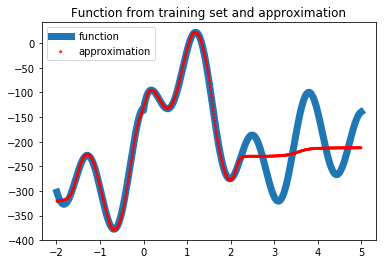

In [33]:
np.random.seed(0)
x = data_read_regression('multimodal',1000)
# Przerobienie danych w taki sposób, aby zbiór treningowy i testowy miał tą samą dziedzinę
x3 = x[3][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x2 = x[2][(x[2] > min(x[0])) & (x[2] < max(x[0]))]
x[2] = x2
x[3] = x3

brain = Network(learning_rate = 0.001, momentum_rate = 0.1, iterations = 130)
brain.add(Layer(1,50,'sigmoid'))
brain.add(Layer(50,200,'sigmoid'))
brain.add(Layer(200,1,'linear'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_regression(brain, x)

Następnie wykorzystamy jeszcze bardziej skomplikowaną sieć i jeszcze więcej danych wejściowych. Niestety widzimy że nic z tego nie będzie - funkcja jest po prostu zbyt skomplikowana.

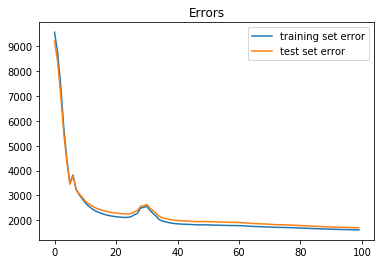

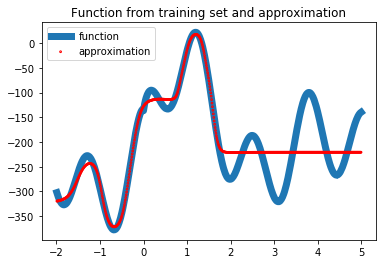

In [34]:
np.random.seed(0)

brain = Network(learning_rate = 0.0001, momentum_rate = 0.9, iterations = 100)
brain.add(Layer(1,5,'sigmoid'))
brain.add(Layer(5,100,'sigmoid'))
brain.add(Layer(100,50,'sigmoid'))
brain.add(Layer(50,100,'sigmoid'))
brain.add(Layer(100,1,'linear'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_regression(brain, x)

# Problem klasyfikacji
W problemie klasyfikacji na wejściu przyjmujemy dwie współrzędne, a na wyjściu powinniśmy ustawić tyle neuronów ile klas chcemy uzyskać. Wybór klasy jest determinowany przez to, który neuron w ostatniej warstwie otrzymuje największą wartość. No właśnie - wartość. Przydałoby się to w jakiś sposób znormalizować, aby wszystkie wartości w ostatniej warstwie sumowały się do $1$, ponieważ tak naprawdę chcemy uzyskać prawdopodobieństwo. </br>
Z pomocą przychodzi funkcja *softmax*:

$\large\sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}$

Z wykorzystaniem jej jako funkcji aktywacji w ostatniej warstwie otrzymujemy wartości sumującej się do $1$.

## Prosta klasyfikacja
W pierwszym przypadku zmierzymy się z prostym podziałem liniowym, na pierwszy rzut oka wydaje się, że nawet prosta sieć dwuwarstwowa powinna poradzić sobie z tym problemem. </br>
Zgodnie z oczekiwaniami, wystarczy bardzo prosta sieć z jednym neuronem w pierwszej warstwie aby rozwiązać liniowy problem klasyfikacji.

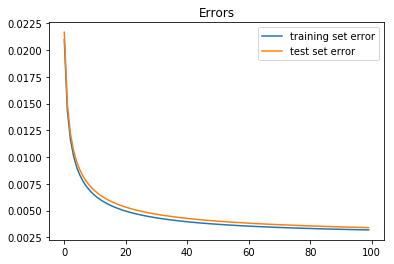

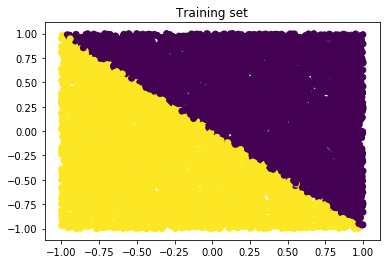

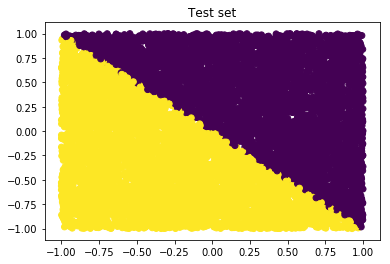

In [12]:
np.random.seed(0)
x = data_read_classification('simple',10000)
brain = Network(learning_rate = 0.1, momentum_rate = 0.8, iterations = 100)
brain.add(Layer(2,1,'sigmoid'))
brain.add(Layer(1,2,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
#errors = brain.train_mini_batch_and_evaluate(x[0],x[1],x[2],x[3],10)
plot_errors(errors)
plot_classification(brain, x)

## XOR
XOR jest już problemem, którego nie da się rozwiązać liniowo, ponieważ musielibyśmy narysować minimum dwie linie, żeby oddzielić segmenty w wynikach.</br>
Dlatego w tym przypadku zwiększymy rozmiar pierwszej warstwy do 4 neuronów

#### Próba liniowego rozwiązania XOR

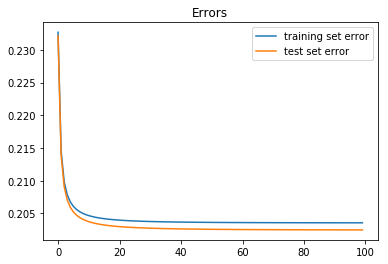

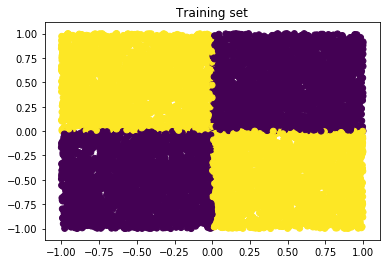

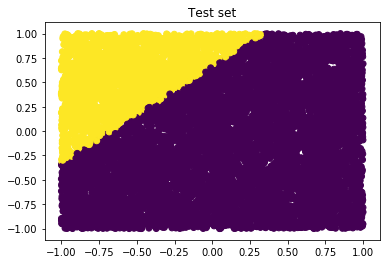

In [13]:
np.random.seed(0)
x = data_read_classification('xor',10000)
brain = Network(learning_rate = 0.1, momentum_rate = 0.9, iterations = 100)
brain.add(Layer(2,1,'sigmoid'))
brain.add(Layer(1,2,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
#errors = brain.train_mini_batch_and_evaluate(x[0],x[1],x[2],x[3],10)
plot_errors(errors)
plot_classification(brain, x)

#### Rozwiązanie dla XOR z 4 neuronami w pierwszej warstwie

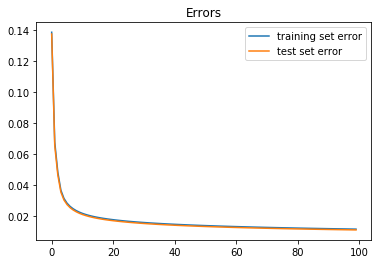

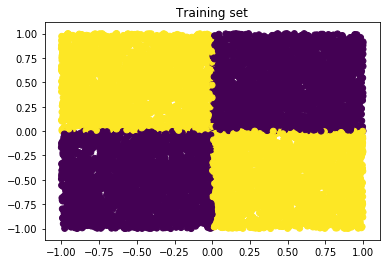

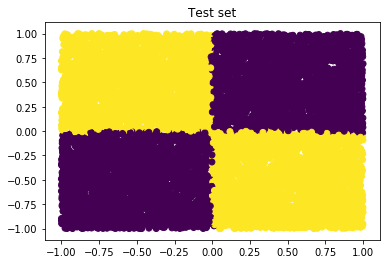

In [14]:
np.random.seed(0)
x = data_read_classification('xor',10000)
brain = Network(learning_rate = 0.1, momentum_rate = 0.9, iterations = 100)
brain.add(Layer(2,4,'sigmoid'))
brain.add(Layer(4,2,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
#errors = brain.train_mini_batch_and_evaluate(x[0],x[1],x[2],x[3],10)
plot_errors(errors)
plot_classification(brain, x)

## Noisy XOR
Jest to podobny problem jak w przypadku zwykłego XOR, jednak dane są o wiele bardziej zaszumione. 

Na początku użyjemy podobnego ustawienia parametrów sieci jak w przypadku niezaszumionego XOR, a w drugim przykładzie wykorzystamy o wiele bardziej skomplikowaną sieć i porównamy błędy.

#### Takie same ustawienia jak w przypadku niezaszumionego XOR
Dane są dosyć mocno zniekształcone, więc mozemy się spodziewać że zaszumiony obszar zostanie po prostu przypisany do jednej z dwóch klas.

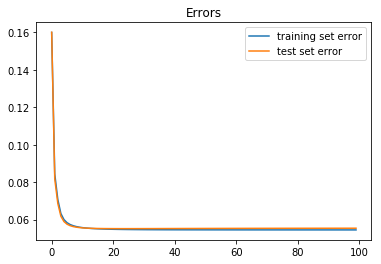

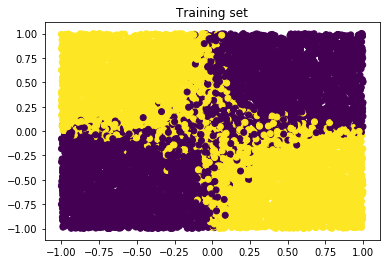

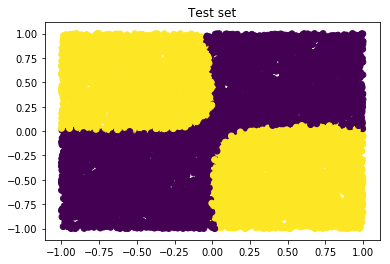

In [15]:
np.random.seed(0)
x = data_read_classification('noisyxor',10000)
brain = Network(learning_rate = 0.1, momentum_rate = 0.9, iterations = 100)
brain.add(Layer(2,4,'sigmoid'))
brain.add(Layer(4,2,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
#errors = brain.train_mini_batch_and_evaluate(x[0],x[1],x[2],x[3],10)
plot_errors(errors)
plot_classification(brain, x)

#### Podobne ustawienia jak w przypadku niezaszumionego XOR, ale z większą liczbą warstw ukrytych
Możemy zauważyć że powiększanie sieci w przypadku zaszumionych danych nie daje lepszych rezultatów. Sieć nie umie sobie poradzić z takim typem danych.

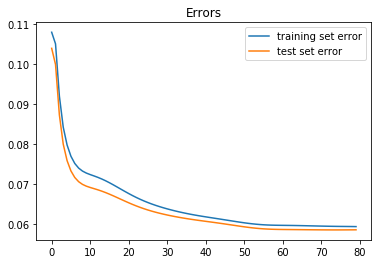

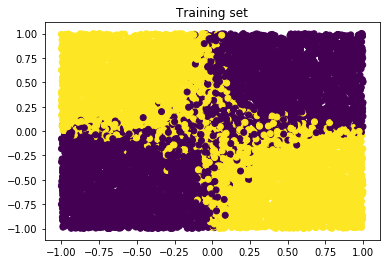

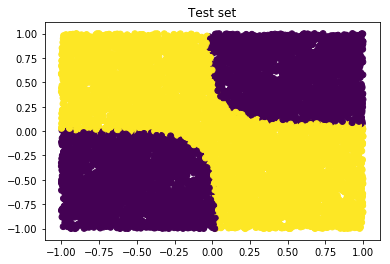

In [16]:
np.random.seed(0)
x = data_read_classification('noisyxor',10000)
brain = Network(learning_rate = 0.1, momentum_rate = 0.8, iterations = 80)
brain.add(Layer(2,20,'sigmoid'))
brain.add(Layer(20,50,'sigmoid'))
brain.add(Layer(50,10,'sigmoid'))
brain.add(Layer(10,2,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_classification(brain, x)

Zobaczmy jeszcze w jaki sposób wygląda dopasowanie na troche innym wykresie (musieliśmy użyć trochę mniejszego zbioru danych, żeby było cokolwiek widać):
- mniej intensywne kolory to zbiór testowy
- bardziej intensywne kolory to zbiór treningowy

Tam gdzie mniej intensywny kolor nie zgadza się z bardziej intensywnym znaczy że dopasowanie nie zostało dobrze przeprowadzone.

Niestety na tych kilku przykładach widać, że sieć nie potrafi sobie poradzić z zaszumionym obszarem, zostaje on przypisany albo do jednej albo drugiej klasy.

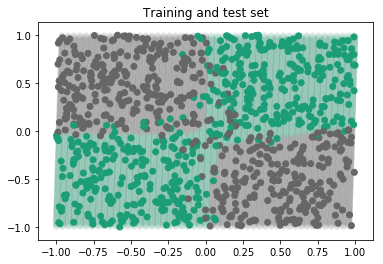

In [17]:
np.random.seed(0)
x = data_read_classification('noisyxor',1000)
brain = Network(learning_rate = 0.1, momentum_rate = 0.8, iterations = 80)
brain.add(Layer(2,20,'sigmoid'))
brain.add(Layer(20,50,'sigmoid'))
brain.add(Layer(50,10,'sigmoid'))
brain.add(Layer(10,2,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_classification_mesh(brain, x)

## Three Gauss
Jest to dosyć skomplikowany problem, ponieważ $3$ klasy nachodzą na siebie w dosyć dużym stopniu. Na początek zobaczmy jak wygląda dopasowanie dla małego zbioru danych. </br>
Możemy zauważyć, że sieć podzieliła przestrzeń na $3$ segmenty i w taki sposób grupuje nam dane wejściowe. Podobnie obszar zaszumiony jest stopniowo podzielony między 3 klasy. Ostatecznie wydaje się, że jest to dobre rozwiązanie.

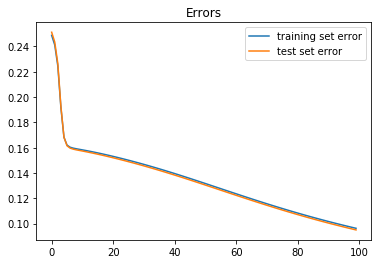

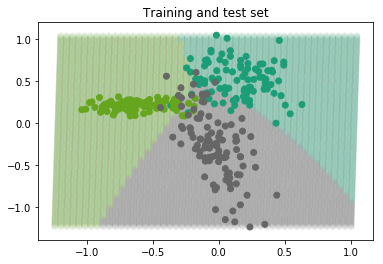

In [40]:
np.random.seed(0)
x = data_read_classification('three_gauss',100)
brain = Network(learning_rate = 0.1, momentum_rate = 0.8, iterations = 100)
brain.add(Layer(2,20,'sigmoid'))
brain.add(Layer(20,30,'sigmoid'))
brain.add(Layer(30,3,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_classification_mesh(brain, x)

Zobaczmy teraz co dzieje się dla większego zbioru danych. Zgodnie z oczekiwaniami otrzymujemy podobny podział i skuteczność.

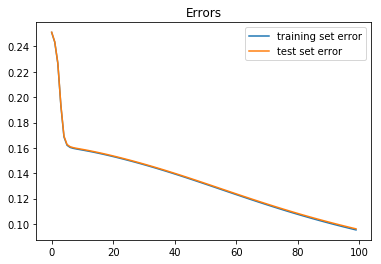

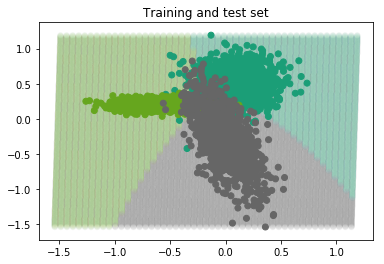

In [41]:
np.random.seed(0)
x = data_read_classification('three_gauss',1000)
brain = Network(learning_rate = 0.01, momentum_rate = 0.8, iterations = 100)
brain.add(Layer(2,20,'sigmoid'))
brain.add(Layer(20,30,'sigmoid'))
brain.add(Layer(30,3,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_classification_mesh(brain, x)

## Circles
Jest to najbardziej skomplikowany zbiór do klasyfikacji. Na obrazku występuje dużo różnych wzorców. Jednak nasza sieć z odpowiednią ilośćią warstw i neuronów w nich zawartych powinna poradzić sobie z tym problemem z dosyć dużą skutecznością.

Na sam początek zobaczmy co dzieje się dla małego zbioru danych. </br>
Widać ewidentnie, że punktów jest trochę za mało aby wykryć jakiekolwiek grupy, które mają odzwierciedlenie na zbiorze testowym, nie pomaga nawet zwiększenie liczby epok na których uczy się sieć. Funkcja błędu w pewnym momencie wypłaszcza się i zamiast delikatnie maleć - rośnie.

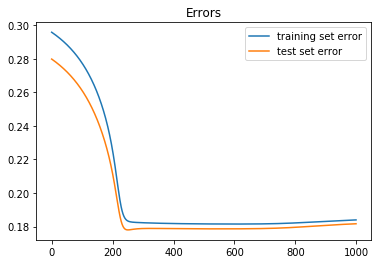

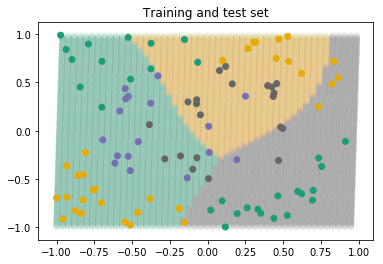

In [20]:
np.random.seed(0)
x = data_read_classification('circles',100)
brain = Network(learning_rate = 0.01, momentum_rate = 0.8, iterations = 1000)
brain.add(Layer(2,10,'sigmoid'))
brain.add(Layer(10,50,'sigmoid'))
brain.add(Layer(50,25,'sigmoid'))
brain.add(Layer(25,4,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_classification_mesh(brain, x)

Po zwiększeniu wielkości zbioru treningowego możemy zauważyć, że sieć dosyć dobrze klasyfikuje punkty na obrzeżach obrazka. Natomiast wydaje się mieć dosyć duży problem z obszarem w centrum obrazka, gdzie dwie grupy punktów dosyć mocno na siebie nachodzą.

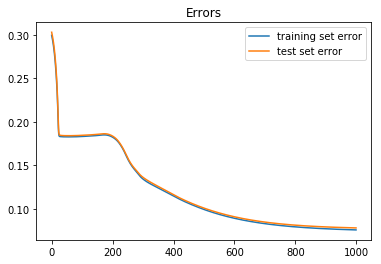

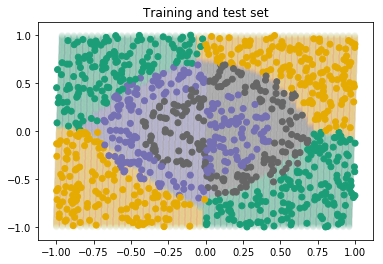

In [21]:
np.random.seed(0)
x = data_read_classification('circles',1000)
brain = Network(learning_rate = 0.01, momentum_rate = 0.8, iterations = 1000)
brain.add(Layer(2,10,'sigmoid'))
brain.add(Layer(10,50,'sigmoid'))
brain.add(Layer(50,25,'sigmoid'))
brain.add(Layer(25,4,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_classification_mesh(brain, x)

Zwiększmy jeszcze zbiór treningowy do $10000$ oraz liczbę iteracji do 3000. Niestety w dalszym ciągu bez powodzenia.

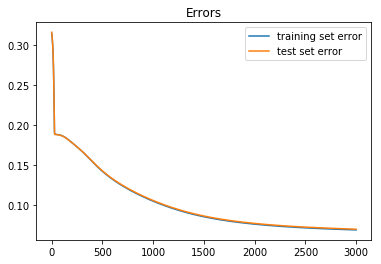

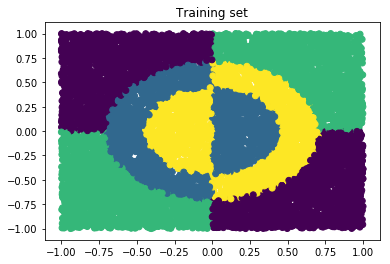

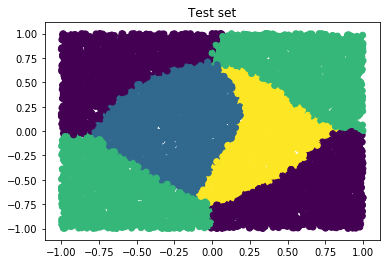

In [12]:
np.random.seed(0)
x = data_read_classification('circles',10000)
brain = Network(learning_rate = 0.01, momentum_rate = 0.8, iterations = 3000)
brain.add(Layer(2,10,'sigmoid'))
brain.add(Layer(10,15,'sigmoid'))
brain.add(Layer(15,4,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_classification(brain, x)

# Tu musimy znaleźć jakąś sieć która to w końcu ogarnie :D

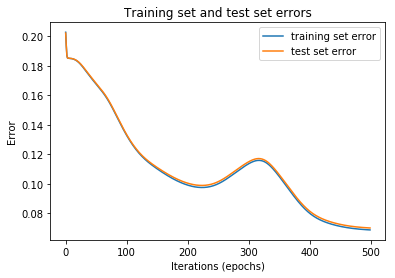

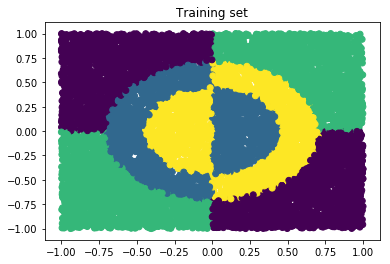

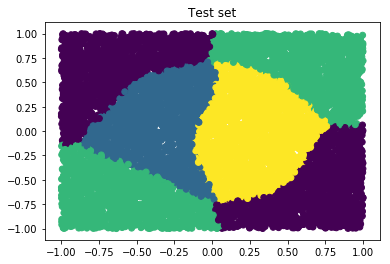

In [12]:
np.random.seed(0)
x = data_read_classification('circles',10000)
brain = Network(learning_rate = 0.1, momentum_rate = 0.8, iterations = 500)
brain.add(Layer(2,10,'sigmoid'))
brain.add(Layer(10,15,'sigmoid'))
brain.add(Layer(15,8,'sigmoid'))
brain.add(Layer(8,4,'softmax'))
errors = brain.train_and_evaluate(x[0],x[1],x[2],x[3])
plot_errors(errors)
plot_classification(brain, x)